# Processo Seletivo

In [169]:
# Importando Bibliotecas necessárias

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as sts


In [170]:
# Importando a base de dados
bi = pd.read_csv("base_ipea.csv", encoding='latin1', sep=';')
bi.head()

,região onde foi realizada a entrevista,idade: qual a sua idade (em anos completos)?,área,sexo,cor ou raça,última série escolar que concluiu com aprovação,até que série o seu pai estudou,até que série a sua mãe estudou,renda total do chefe da família no último mês,renda total de todos os moradores (parentes e agregados) no último mês,...,a roupa suja deve ser lavada em casa,uma mulher só se sente realizada quando tem filhos/as,"a mulher casada deve satisfazer o marido na cama, mesmo quando não tem vontade","piada de preto é só brincadeira, não é racismo",um casal de dois homens vive um amor tão bonito quanto entre um homem e uma mulh,mulher que é agredida e continua com o parceiro gosta de apanhar,casamento de homem com homem ou de mulher com mulher deve ser proibido,a mulher que apanha em casa deve ficar quieta para não prejudicar os filhos,a questão da violência contra as mulheres recebe mais importância do que merece,"tem mulher que é pra casar, tem mulher que é pra cama"
0,NORTE,34,urbano,feminino,parda,quinta série fundamental,analfabeto ou sem instrução,quarta série fundamental completa,1000.0,1490.0,...,concorda total,discorda total,discorda total,concorda parcial,concorda total,concorda total,concorda parcial,discorda total,concorda total,concorda total
1,NORTE,53,urbano,masculino,branca,médio completo,oitava série fundamental incompleta,oitava série fundamental incompleta,4800.0,4900.0,...,concorda total,discorda total,discorda total,concorda parcial,concorda parcial,concorda total,concorda total,concorda parcial,concorda parcial,concorda total
2,NORTE,31,urbano,masculino,preta,analfabeto ou sem instrução,analfabeto ou sem instrução,analfabeto ou sem instrução,678.0,678.0,...,discorda total,ns,discorda total,concorda parcial,discorda total,concorda total,discorda total,discorda total,discorda total,discorda total
3,NORDESTE,38,urbano,feminino,parda,sétima série fundamental,cursou superior sem concluir,segunda série médio,1000.0,1000.0,...,concorda total,concorda total,discorda parcial,discorda parcial,concorda total,discorda parcial,discorda parcial,concorda total,neutro,concorda parcial
4,NORDESTE,21,urbano,feminino,parda,primeira série médio,analfabeto ou sem instrução,analfabeto ou sem instrução,678.0,678.0,...,concorda parcial,discorda parcial,discorda parcial,concorda total,concorda parcial,concorda parcial,discorda parcial,concorda total,discorda total,discorda parcial


In [29]:
print(bi.columns)

Index(['região onde foi realizada a entrevista',
       'idade: qual a sua idade (em anos completos)?', 'área', 'sexo',
       'cor ou raça', 'última série escolar que concluiu com aprovação',
       'até que série o seu pai estudou', 'até que série a sua mãe estudou',
       'renda total do chefe da família no último mês',
       'renda total de todos os moradores (parentes e agregados) no último mês',
       'número de moradores no domicílio (parentes e agregados)',
       'no último mês, alguma pessoa deste domicílio recebeu rendimentos do bolsa famíli',
       'religião',
       'mulheres que usam roupas que mostram o corpo merecem ser atacadas',
       'as mulatas são mais fogosas do que as mulheres brancas',
       'dá para entender que um homem que cresceu em uma família violenta agrida sua mul',
       'os homens devem ser a cabeça do lar',
       'casos de violência dentro de casa devem ser discutidos somente entre os membros ',
       'incomoda ver dois homens, ou duas mulher

In [167]:
# A base é composta por quantas linhas e colunas? 

print(f"A base de dados tem {bi.shape[0]} linhas e {bi.shape[1]} colunas.")

A base de dados tem 3810 linhas e 41 colunas.


In [37]:
# Calculando a frequência de pessoas em cada região do Brasil.
frequency = bi['região onde foi realizada a entrevista'].value_counts().to_frame().rename(columns={'região onde foi realizada a entrevista': 'frequência absoluta'})
frequency['frequência relativa'] = bi['região onde foi realizada a entrevista'].value_counts(normalize=True) 
print(frequency)

              frequência absoluta  frequência relativa
SUDESTE                      1605             0.421260
NORDESTE                     1065             0.279528
SUL                           555             0.145669
NORTE                         300             0.078740
CENTRO-OESTE                  285             0.074803


In [40]:
# Calculando a a região mais frequente (moda)
moda = sts.mode(bi['região onde foi realizada a entrevista'])
moda

'SUDESTE'

In [43]:
# Qual é a idade da pessoa mais nova nessa amostra? E da mais velha?

y_min = bi['idade: qual a sua idade (em anos completos)?'].min()
y_max = bi['idade: qual a sua idade (em anos completos)?'].max()
print(f"A pessoa mais nova tem {y_min} anos, já a mais velha tem {y_max} anos")


A pessoa mais nova tem 16 anos, já a mais velha tem 88 anos


In [54]:
# Calcule a média, a mediana e a moda para a variável idade.

mean = round(sts.mean(bi['idade: qual a sua idade (em anos completos)?']), 2)
median = sts.median(bi['idade: qual a sua idade (em anos completos)?'])
mode = sts.mode(bi['idade: qual a sua idade (em anos completos)?'])
print(f"A média da idade é de aproximadamente {mean} anos, a mediana é: {median} anos e a moda é: {mode} anos")


A média da idade é de aproximadamente 42.32 anos, a mediana é: 41.0 anos e a moda é: 18 anos


### Sobre a distribuição dessa variável (assimétrica positiva, assimétrica negativa ou simétrica)?
A distribuição da variável idade é caracterizada por uma assimetria positiva, o que significa que há uma concentração maior de indivíduos com idades abaixo da média (cerca de 42 anos) e uma dispersão maior de indivíduos com idades acima da média. Essa assimetria é evidenciada pela cauda direita da distribuição, que é mais longa do que a cauda esquerda. Além disso, a moda da distribuição está em torno de 18 anos, um valor muito baixo quando comparado à média e mediana, o que também indica essa assimetria.

<AxesSubplot:xlabel='idade: qual a sua idade (em anos completos)?', ylabel='Density'>

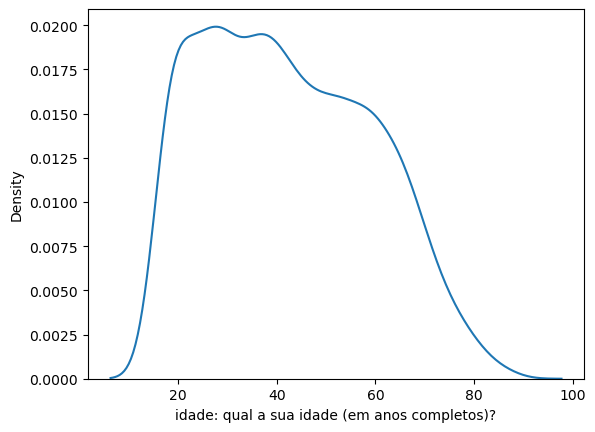

In [136]:
sns.kdeplot(data = bi['idade: qual a sua idade (em anos completos)?'])

In [82]:
# Classifique as idades de acordo com as faixas etárias a seguir. (Crie uma nova coluna no data frame para essa classificação)

# Cria uma nova coluna 
bi['Faixa Etária'] = ''

# idade =< 29 - Jovem
bi.loc[bi['idade: qual a sua idade (em anos completos)?'] <= 29, 'Faixa Etária'] = 'Jovem'

# 30 =< idade =< 59 - Adulto
bi.loc[(bi['idade: qual a sua idade (em anos completos)?']>= 30) & (bi['idade: qual a sua idade (em anos completos)?'] <= 59), 'Faixa Etária'] = 'Adulto'

# idade >= 60 - Idoso
bi.loc[bi['idade: qual a sua idade (em anos completos)?'] >= 60, 'Faixa Etária'] = 'Idoso'

bi.head()

,região onde foi realizada a entrevista,idade: qual a sua idade (em anos completos)?,área,sexo,cor ou raça,última série escolar que concluiu com aprovação,até que série o seu pai estudou,até que série a sua mãe estudou,renda total do chefe da família no último mês,renda total de todos os moradores (parentes e agregados) no último mês,...,uma mulher só se sente realizada quando tem filhos/as,"a mulher casada deve satisfazer o marido na cama, mesmo quando não tem vontade","piada de preto é só brincadeira, não é racismo",um casal de dois homens vive um amor tão bonito quanto entre um homem e uma mulh,mulher que é agredida e continua com o parceiro gosta de apanhar,casamento de homem com homem ou de mulher com mulher deve ser proibido,a mulher que apanha em casa deve ficar quieta para não prejudicar os filhos,a questão da violência contra as mulheres recebe mais importância do que merece,"tem mulher que é pra casar, tem mulher que é pra cama",Faixa Etária
0,NORTE,34,urbano,feminino,parda,quinta série fundamental,analfabeto ou sem instrução,quarta série fundamental completa,1000.0,1490.0,...,discorda total,discorda total,concorda parcial,concorda total,concorda total,concorda parcial,discorda total,concorda total,concorda total,Adulto
1,NORTE,53,urbano,masculino,branca,médio completo,oitava série fundamental incompleta,oitava série fundamental incompleta,4800.0,4900.0,...,discorda total,discorda total,concorda parcial,concorda parcial,concorda total,concorda total,concorda parcial,concorda parcial,concorda total,Adulto
2,NORTE,31,urbano,masculino,preta,analfabeto ou sem instrução,analfabeto ou sem instrução,analfabeto ou sem instrução,678.0,678.0,...,ns,discorda total,concorda parcial,discorda total,concorda total,discorda total,discorda total,discorda total,discorda total,Adulto
3,NORDESTE,38,urbano,feminino,parda,sétima série fundamental,cursou superior sem concluir,segunda série médio,1000.0,1000.0,...,concorda total,discorda parcial,discorda parcial,concorda total,discorda parcial,discorda parcial,concorda total,neutro,concorda parcial,Adulto
4,NORDESTE,21,urbano,feminino,parda,primeira série médio,analfabeto ou sem instrução,analfabeto ou sem instrução,678.0,678.0,...,discorda parcial,discorda parcial,concorda total,concorda parcial,concorda parcial,discorda parcial,concorda total,discorda total,discorda parcial,Jovem


In [153]:
# A amostra é composta de mais Jovens, Adultos ou Idosos?
bi['Faixa Etária'].value_counts()
print(bi['Faixa Etária'].value_counts(), '\nA amostra é mais composta por adultos.')

Adulto    1995
Jovem     1087
Idoso      728
Name: Faixa Etária, dtype: int64 
A amostra é mais composta por adultos.


In [131]:
# Criando uma função para fazer os calcúlos não apenas de uma coluna específica, mas de outras:
def calculate(column):
    #  Calcule a média e a mediana:
    mean = round(column.mean(), 2)
    median = column.median()
    #  Calcule o primeiro quartil e o terceiro quartil:
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    #  Calcule os valores máximo e mínimo:
    maximum = column.max()
    minimum = column.min()
    
    print(f"A média é de: {mean} e a mediana é de: {median}")
    print(f"O primeiro quartil é: {q1} e o terceiro quartil é : {q3}")
    print(f"O valor máximo é: {maximum} e o mínimo é : {minimum}")
    

In [132]:
renda = bi['renda total de todos os moradores (parentes e agregados) no último mês']
calculate(renda)

A média é de: 1801.48 e a mediana é de: 1400.0
O primeiro quartil é: 800.0 e o terceiro quartil é : 2150.0
O valor máximo é: 19000.0 e o mínimo é : 150.0


In [133]:
renda.describe()

count     3283.000000
mean      1801.478221
std       1540.482541
min        150.000000
25%        800.000000
50%       1400.000000
75%       2150.000000
max      19000.000000
Name: renda total de todos os moradores (parentes e agregados) no último mês, dtype: float64

### Interprete o primeiro e o terceiro quartis encontrados no item anterior. 
O primeiro quartil divide a distribuição de renda em 25% dos valores mais baixos e 75% dos valores mais altos, enquanto o terceiro quartil divide a distribuição em 75% dos valores mais baixos e 25% dos valores mais altos. No caso da variável "renda total de todos os moradores (parentes e agregados) no último mês", o primeiro quartil é 800, o que indica que 25% dos domicílios possuem uma renda igual ou inferior a esse valor. Já o terceiro quartil é 2150, o que significa que 75% dos domicílios possuem uma renda total igual ou inferior a esse valor. Com isso, podemos concluir que metade dos domicílios apresentam uma renda total entre 800 e 2150. 

In [146]:
#  Crie uma função que calcule o coeficiente de variação
def coef_var(column):
    mean = column.mean()
    std = column.std()
    cv = round((std / mean) * 100, 2)
    return cv

In [152]:
# Calcule o coeficiente de variação para a variável idade e renda. Compare os dois coeficientes de variação. 
age = bi['idade: qual a sua idade (em anos completos)?']

print('O coeficiente de variação da idade é:', coef_var(age))
print('O coeficiente de variação da renda é:', coef_var(renda))


O coeficiente de variação da idade é: 39.97
O coeficiente de variação da renda é: 85.51


###  Compare os dois coeficientes de variação:
A comparação dos coeficientes de variação mostra que a renda apresenta uma variação maior em relação à média do que a idade, ou seja, há mais dispersão dos dados de renda em torno da média do que da idade. Essa informação é importante para identificar valores fora do padrão que possam afetar a análise estatística.

In [162]:
# Calcule o desvio-padrão para a renda de acordo com cada região do Brasil:

std_region = bi.groupby('região onde foi realizada a entrevista')['renda total de todos os moradores (parentes e agregados) no último mês'].std().round(2)
print(std_region)


região onde foi realizada a entrevista
CENTRO-OESTE    1343.43
NORDESTE        1189.55
NORTE           1757.77
SUDESTE         1670.98
SUL             1316.88
Name: renda total de todos os moradores (parentes e agregados) no último mês, dtype: float64


### Qual é a região que possui um comportamento mais homogêneo em relação à renda?
A região do Nordeste é a que apresenta o comportamento mais homogêneo em relação à renda, pois possui o menor desvio-padrão (1189,55). Isso significa que a renda dos domicílios nessa região varia menos em torno da média do que as rendas dos domicílios das outras regiões do Brasil. Em outras palavras, os valores da renda dos domicílios nordestinos estão mais próximos da média quando comparados com as rendas dos domicílios das outras regiões.